# Capstone Project: 
## Segmenting and Clustering Neighborhoods in Toronto, Canada

#### by: Nur Agus Permadi Anwar

# Part 1: 
- Create a dataframe consists of three columns: 'Postalcode', 'Borough', and 'Neighbourhood'.
- Only process the cells that have an assigned borough. Ignore cells with a borough that is 'Not assigned'.
- More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11  in the above table.
- If a cell has a borough but a Not assigned  neighborhood, then the neighborhood will be the same as the borough.
- Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.
- In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.
- Submit a link to your Notebook on your Github repository.

In [71]:
#first, import pandas:
import pandas as pd

In [72]:
#perform data wrangling on Wikipedia's html page as specified in URL below, then load it to a dataframe:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')[0]
df

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
175,M5Z,Not assigned,Not assigned
176,M6Z,Not assigned,Not assigned
177,M7Z,Not assigned,Not assigned
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


In [73]:
#rename the column 'Postal Code' to 'PostalCode' to eliminate space, as required:
df.rename(columns = {'Postal Code':'PostalCode', 'Neighbourhood': 'Neighborhood'}, inplace = True) 

In [74]:
df = df[df.Borough != 'Not assigned']
df

,PostalCode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [75]:
df.shape

(103, 3)

# Part 2:
Now that you have built a dataframe of the postal code of each neighborhood along with the borough name and neighborhood name, in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood. 

I will use the following link to a csv file that has the geographical coordinates of each postal code: http://cocl.us/Geospatial_data to create the second dataframe which contains the latitude and the longitude coordinates of each neighborhood. 

In [76]:
#first, organize the dataframe using 'groupby' to make it easier to apply additional lattitude & longitude data:
df_postcode = df.groupby(['PostalCode', 'Borough'])['Neighborhood'].apply(', '.join).reset_index()
df_postcode.head()

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [77]:
#then, retrieve the csv file and load it to a new dataframe called 'locgeo_df'
locgeo_df = pd.read_csv('https://cocl.us/Geospatial_data', index_col='Postal Code')
locgeo_df

,Latitude,Longitude
Postal Code,,
M1B,43.806686,-79.194353
M1C,43.784535,-79.160497
M1E,43.763573,-79.188711
M1G,43.770992,-79.216917
M1H,43.773136,-79.239476
...,...,...
M9N,43.706876,-79.518188
M9P,43.696319,-79.532242
M9R,43.688905,-79.554724


In [78]:
#finally, combine the latitude and longitude data to the PostalCode data, then assigned it to a new dataframe 'toronto_data'
toronto_data = df_postcode.join(locgeo_df, on='PostalCode')

In [79]:
toronto_data

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188
99,M9P,Etobicoke,Westmount,43.696319,-79.532242
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ...",43.688905,-79.554724
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437


# Part 3
Explore and cluster the neighborhoods in Toronto. You can decide to work with only boroughs that contain the word Toronto and then replicate the same analysis we did to the New York City data. It is up to you. 

Just make sure:
- to add enough Markdown cells to explain what you decided to do and to report any observations you make. 
- to generate maps to visualize your neighborhoods and how they cluster together. 

#### Import the necessary libraries

In [80]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')


Libraries imported.


Let's check the total number of boroughs and neighborhoods in Toronto dataframe:

In [81]:
print('The Toronto dataframe has {} boroughs and {} neighborhoods.'.format(
        len(toronto_data['Borough'].unique()),
        toronto_data.shape[0]
    )
)

The Toronto dataframe has 10 boroughs and 103 neighborhoods.


#### Use geopy library to get the latitude and longitude values of Toronto.
In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>toronto_agent</em>, as shown below.

In [82]:
address = 'Toronto, CA'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


#### Create a map of Toronto with neighborhoods superimposed on top.

In [111]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Borough'], toronto_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### Screenshot of the map - Part 1:
#### Pic 1 - Create a map of Toronto with neighborhoods superimposed on top
The map is unable to render on git hub, so I attach a screenshot of it in a png file format

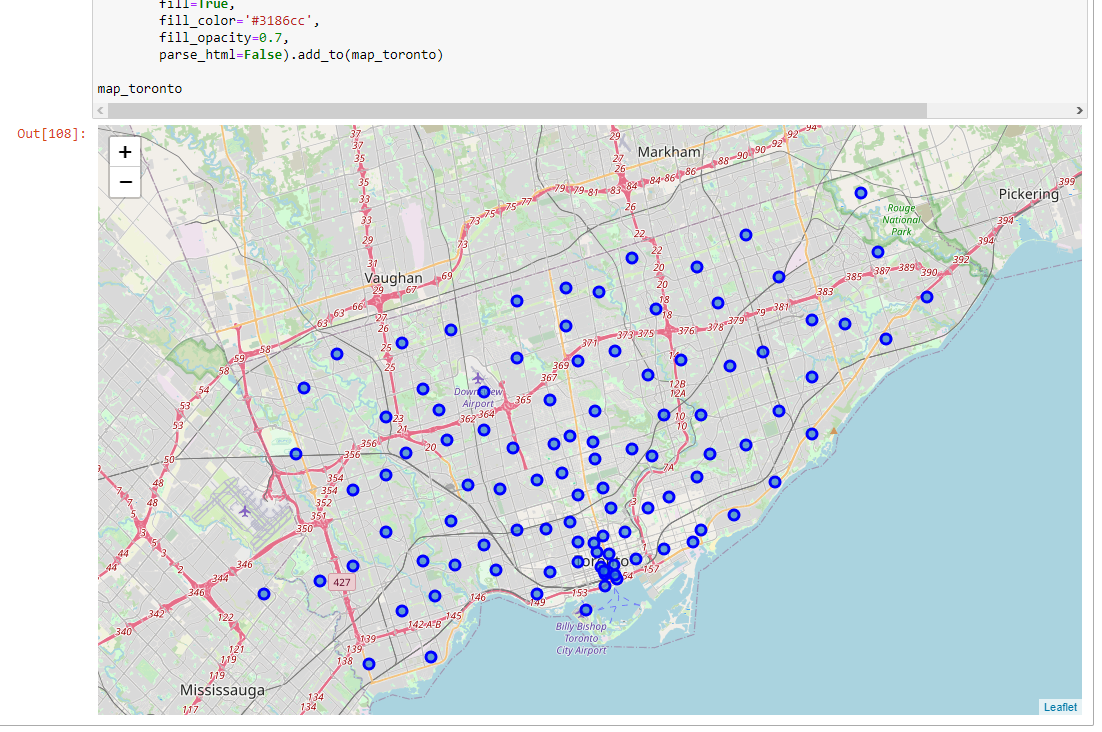

**Folium** is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of the neighborhood and its respective borough.

However, for illustration purposes, let's simplify the above map and segment and cluster only the neighborhoods in Downtown Toronto. So let's slice the original dataframe and create a new dataframe of the Downtown Toronto data.


In [84]:
downtown_data = toronto_data[toronto_data['Borough'] == 'Downtown Toronto'].reset_index(drop=True)
downtown_data.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529
1,M4X,Downtown Toronto,"St. James Town, Cabbagetown",43.667967,-79.367675
2,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
3,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
4,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


Let's get the geographical coordinates of Downtown Toronto.

In [85]:
address = 'Downtown Toronto, Toronto'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Downtown Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Downtown Toronto are 43.6541737, -79.38081164513409.


As we did with all of Toronto, let's visualize the neighborhoods in Downtown Toronto.

In [109]:
# create map of Downtown Toronto using latitude and longitude values
map_downtown = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(downtown_data['Latitude'], downtown_data['Longitude'], downtown_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_downtown)  
    
map_downtown

### Screenshot of the map - Part 2:
#### Pic 2 - Visualization of the neighborhoods in Downtown Toronto
The map is unable to render on git hub, so I attach a screenshot of it in a png file format

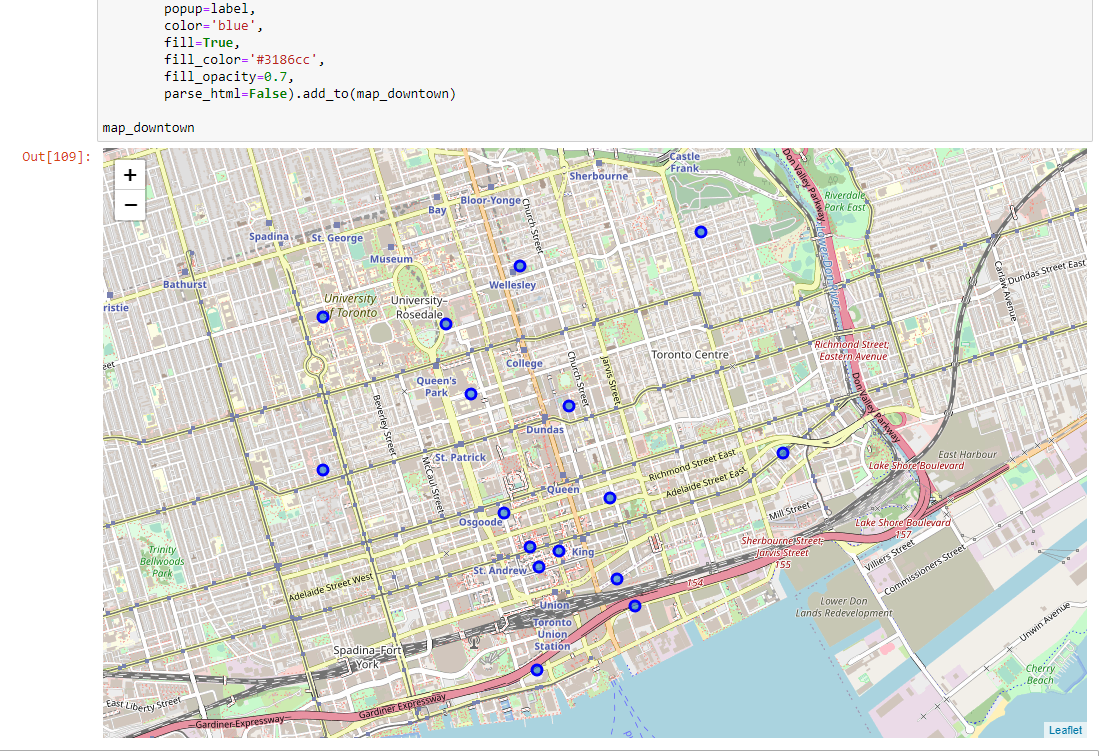

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

#### Define Foursquare Credentials and Version

In [87]:
CLIENT_ID = 'OO1BEHY2H4UD4CRPAIWNPYZWFBZTDWTHMO0SPGOL4JDMXSES' # your Foursquare ID
CLIENT_SECRET = 'ACQ3EUPI5IDNL5XEOIXS3E34FNDF0C1WYDJN5FQW5E15VXCL' # your Foursquare Secret
ACCESS_TOKEN = 'LQV0WXH0WLAQCKUEBEWNICBCTEV5HI4GQY0VHDZG43OSDKGX' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: OO1BEHY2H4UD4CRPAIWNPYZWFBZTDWTHMO0SPGOL4JDMXSES
CLIENT_SECRET:ACQ3EUPI5IDNL5XEOIXS3E34FNDF0C1WYDJN5FQW5E15VXCL


#### Let's explore the first neighborhood in our dataframe.
Get the neighborhood's name.

In [88]:
downtown_data.loc[0, 'Neighborhood']

'Rosedale'

Get the neighborhood's latitude and longitude values.

In [89]:
neighborhood_latitude = downtown_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = downtown_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = downtown_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Rosedale are 43.6795626, -79.37752940000001.


#### Now, let's get the top 100 venues that are in Rosedale within a radius of 1000 meters.
First, let's create the GET request URL. Name your URL **url**.

In [90]:
# type your answer here

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=OO1BEHY2H4UD4CRPAIWNPYZWFBZTDWTHMO0SPGOL4JDMXSES&client_secret=ACQ3EUPI5IDNL5XEOIXS3E34FNDF0C1WYDJN5FQW5E15VXCL&v=20180604&ll=43.6795626,-79.37752940000001&radius=1000&limit=100'

Send the GET request and examine the results

In [91]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '601a8e4db94b821bdc510a18'},
 'response': {'headerLocation': 'Rosedale',
  'headerFullLocation': 'Rosedale, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 20,
  'suggestedBounds': {'ne': {'lat': 43.68856260900001,
    'lng': -79.36510816548741},
   'sw': {'lat': 43.670562590999985, 'lng': -79.38995063451262}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4adcb343f964a520e32e21e3',
       'name': 'Summerhill Market',
       'location': {'address': '446 Summerhill Ave',
        'crossStreet': 'btwn. MacLennan Ave. and Glen Rd.',
        'lat': 43.68626482142425,
        'lng': -79.37545823237794,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.68626482142425,
          'lng': -79.3754582

From the Foursquare lab in the previous module, we know that all the information is in the _items_ key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.

In [92]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a _pandas_ dataframe.

In [93]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-93-561c05f0fdd1>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,Summerhill Market,Grocery Store,43.686265,-79.375458
1,Black Camel,BBQ Joint,43.677016,-79.389367
2,Toronto Lawn Tennis Club,Athletics & Sports,43.680667,-79.388559
3,Maison Selby,Bistro,43.671232,-79.376618
4,Pie Squared,Pie Shop,43.672143,-79.377856


And how many venues were returned by Foursquare?

In [94]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

20 venues were returned by Foursquare.


## 2. Explore Neighborhoods in Downtown Toronto

#### Let's create a function to repeat the same process to all the neighborhoods in Downtown Toronto

In [95]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called _downtown_venues_.

In [96]:
# type your answer here
downtown_venues = getNearbyVenues(names=downtown_data['Neighborhood'],
                                   latitudes=downtown_data['Latitude'],
                                   longitudes=downtown_data['Longitude']
                                  )

Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Stn A PO Boxes
First Canadian Place, Underground city
Christie
Queen's Park, Ontario Provincial Government


#### Let's check the size of the resulting dataframe

In [97]:
print(downtown_venues.shape)
downtown_venues.head()

(1215, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Rosedale,43.679563,-79.377529,Rosedale Park,43.682328,-79.378934,Playground
1,Rosedale,43.679563,-79.377529,Whitney Park,43.682036,-79.373788,Park
2,Rosedale,43.679563,-79.377529,Alex Murray Parkette,43.678300,-79.382773,Park
3,Rosedale,43.679563,-79.377529,Milkman's Lane,43.676352,-79.373842,Trail
4,"St. James Town, Cabbagetown",43.667967,-79.367675,Cranberries,43.667843,-79.369407,Diner


Let's check how many venues were returned for each neighborhood

In [98]:
downtown_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,56,56,56,56,56,56
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",16,16,16,16,16,16
Central Bay Street,62,62,62,62,62,62
Christie,17,17,17,17,17,17
Church and Wellesley,78,78,78,78,78,78
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
"First Canadian Place, Underground city",100,100,100,100,100,100
"Garden District, Ryerson",100,100,100,100,100,100
"Harbourfront East, Union Station, Toronto Islands",100,100,100,100,100,100


#### Let's find out how many unique categories can be curated from all the returned venues

In [99]:
print('There are {} uniques categories.'.format(len(downtown_venues['Venue Category'].unique())))

There are 207 uniques categories.


## 3. Analyze Each Neighborhood

In [100]:
# one hot encoding
downtown_onehot = pd.get_dummies(downtown_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
downtown_onehot['Neighborhood'] = downtown_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [downtown_onehot.columns[-1]] + list(downtown_onehot.columns[:-1])
downtown_onehot = downtown_onehot[fixed_columns]

downtown_onehot.head()

,Yoga Studio,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Thai Restaurant,Theater,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.

In [55]:
downtown_onehot.shape

(1215, 207)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [56]:
downtown_grouped = downtown_onehot.groupby('Neighborhood').mean().reset_index()
downtown_grouped

,Neighborhood,Yoga Studio,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Thai Restaurant,Theater,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop
0,Berczy Park,0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,...,0.017857,0.000000,0.000000,0.00,0.00,0.017857,0.000000,0.00000,0.000000,0.000000
1,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.000000,0.0625,0.0625,0.0625,0.125,0.1875,0.125,0.000000,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00000,0.000000,0.000000
2,Central Bay Street,0.016129,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,...,0.016129,0.000000,0.000000,0.00,0.00,0.016129,0.000000,0.00000,0.016129,0.000000
3,Christie,0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00000,0.000000,0.000000
4,Church and Wellesley,0.025641,0.012821,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.012821,...,0.012821,0.012821,0.012821,0.00,0.00,0.000000,0.000000,0.00000,0.000000,0.000000
5,"Commerce Court, Victoria Hotel",0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.040000,...,0.020000,0.000000,0.000000,0.00,0.00,0.020000,0.000000,0.00000,0.010000,0.000000
6,"First Canadian Place, Underground city",0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.030000,...,0.020000,0.010000,0.000000,0.00,0.01,0.010000,0.000000,0.00000,0.010000,0.000000
7,"Garden District, Ryerson",0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,...,0.010000,0.020000,0.000000,0.00,0.00,0.000000,0.010000,0.01000,0.010000,0.000000
8,"Harbourfront East, Union Station, Toronto Islands",0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,...,0.000000,0.010000,0.000000,0.00,0.01,0.010000,0.000000,0.00000,0.010000,0.000000
9,"Kensington Market, Chinatown, Grange Park",0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.00,0.065574,0.000000,0.04918,0.016393,0.000000


#### Let's confirm the new size

In [101]:
downtown_grouped.shape

(19, 207)

#### Let's print each neighborhood along with the top 5 most common venues

In [102]:
num_top_venues = 5

for hood in downtown_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = downtown_grouped[downtown_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
          venue  freq
0   Coffee Shop  0.09
1  Cocktail Bar  0.05
2      Beer Bar  0.04
3    Restaurant  0.04
4   Cheese Shop  0.04


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
              venue  freq
0   Airport Service  0.19
1    Airport Lounge  0.12
2  Airport Terminal  0.12
3       Coffee Shop  0.06
4           Airport  0.06


----Central Bay Street----
                venue  freq
0         Coffee Shop  0.18
1                Café  0.05
2  Italian Restaurant  0.05
3      Sandwich Place  0.05
4         Salad Place  0.03


----Christie----
                venue  freq
0       Grocery Store  0.24
1                Café  0.18
2                Park  0.12
3  Athletics & Sports  0.06
4          Baby Store  0.06


----Church and Wellesley----
                 venue  freq
0          Coffee Shop  0.09
1     Sushi Restaurant  0.06
2  Japanese Restaurant  0.06
3           Restaurant  0.04
4              

#### Let's put that into a _pandas_ dataframe
First, let's write a function to sort the venues in descending order.

In [103]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [104]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = downtown_grouped['Neighborhood']

for ind in np.arange(downtown_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(downtown_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Beer Bar,Cheese Shop,Bakery,Restaurant,Farmers Market,Seafood Restaurant,Creperie,Liquor Store
1,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Terminal,Airport Lounge,Boat or Ferry,Plane,Rental Car Location,Harbor / Marina,Coffee Shop,Airport Gate,Airport Food Court
2,Central Bay Street,Coffee Shop,Sandwich Place,Italian Restaurant,Café,Burger Joint,Salad Place,Bubble Tea Shop,Pizza Place,Middle Eastern Restaurant,Park
3,Christie,Grocery Store,Café,Park,Athletics & Sports,Italian Restaurant,Nightclub,Candy Store,Restaurant,Bank,Baby Store
4,Church and Wellesley,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Gay Bar,Restaurant,Café,Pub,Hotel,Yoga Studio,Mediterranean Restaurant


## 4. Cluster Neighborhoods

Run _k_-means to cluster the neighborhood into 5 clusters.

In [105]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 5

downtown_grouped_clustering = downtown_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(downtown_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 0, 1, 2, 1, 1, 1, 1, 1, 4])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [106]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

downtown_merged = downtown_data

# merge downtown_grouped with downtown_data to add latitude/longitude for each neighborhood
downtown_merged = downtown_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

downtown_merged.head() # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529,3,Park,Trail,Playground,Creperie,Doner Restaurant,Dog Run,Distribution Center,Discount Store,Diner,Dessert Shop
1,M4X,Downtown Toronto,"St. James Town, Cabbagetown",43.667967,-79.367675,1,Coffee Shop,Bakery,Restaurant,Pub,Italian Restaurant,Pizza Place,Café,Market,Park,Chinese Restaurant
2,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,1,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Gay Bar,Restaurant,Café,Pub,Hotel,Yoga Studio,Mediterranean Restaurant
3,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1,Coffee Shop,Pub,Park,Bakery,Restaurant,Theater,Breakfast Spot,Café,Electronics Store,Performing Arts Venue
4,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,1,Clothing Store,Coffee Shop,Bubble Tea Shop,Middle Eastern Restaurant,Café,Japanese Restaurant,Cosmetics Shop,Hotel,Ramen Restaurant,Movie Theater


Finally, let's visualize the resulting clusters

In [110]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(downtown_merged['Latitude'], downtown_merged['Longitude'], downtown_merged['Neighborhood'], downtown_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Screenshot of the map - Part 3:
#### Pic 3 - Visualization of the resulting clusters
The map is unable to render on git hub, so I attach a screenshot of it in a png file format

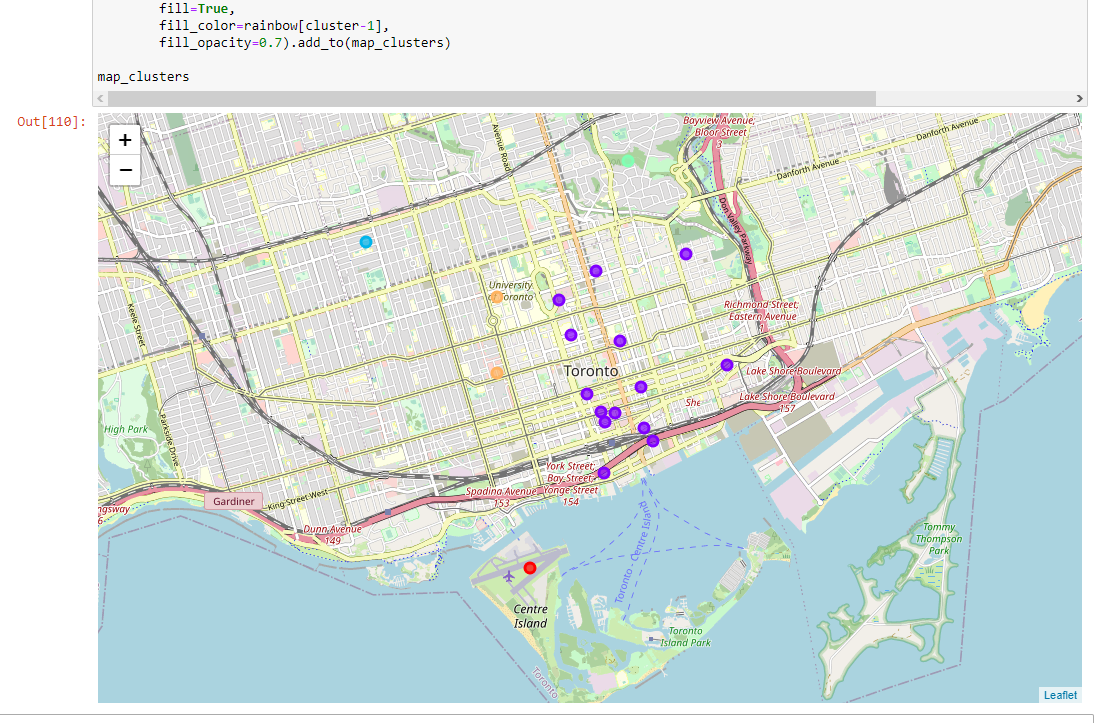

## 5. Examine Clusters in Downtown Toronto

#### Cluster 1

In [66]:
downtown_merged.loc[downtown_merged['Cluster Labels'] == 0, downtown_merged.columns[[1] + list(range(5, downtown_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Downtown Toronto,0,Airport Service,Airport Terminal,Airport Lounge,Boat or Ferry,Plane,Rental Car Location,Harbor / Marina,Coffee Shop,Airport Gate,Airport Food Court


#### Cluster 2

In [67]:
downtown_merged.loc[downtown_merged['Cluster Labels'] == 1, downtown_merged.columns[[1] + list(range(5, downtown_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Downtown Toronto,1,Coffee Shop,Bakery,Restaurant,Pub,Italian Restaurant,Pizza Place,Café,Market,Park,Chinese Restaurant
2,Downtown Toronto,1,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Gay Bar,Restaurant,Café,Pub,Hotel,Yoga Studio,Mediterranean Restaurant
3,Downtown Toronto,1,Coffee Shop,Pub,Park,Bakery,Restaurant,Theater,Breakfast Spot,Café,Electronics Store,Performing Arts Venue
4,Downtown Toronto,1,Clothing Store,Coffee Shop,Bubble Tea Shop,Middle Eastern Restaurant,Café,Japanese Restaurant,Cosmetics Shop,Hotel,Ramen Restaurant,Movie Theater
5,Downtown Toronto,1,Coffee Shop,Café,American Restaurant,Gastropub,Cocktail Bar,Bakery,Farmers Market,Gym,Seafood Restaurant,Department Store
6,Downtown Toronto,1,Coffee Shop,Cocktail Bar,Beer Bar,Cheese Shop,Bakery,Restaurant,Farmers Market,Seafood Restaurant,Creperie,Liquor Store
7,Downtown Toronto,1,Coffee Shop,Sandwich Place,Italian Restaurant,Café,Burger Joint,Salad Place,Bubble Tea Shop,Pizza Place,Middle Eastern Restaurant,Park
8,Downtown Toronto,1,Coffee Shop,Café,Restaurant,Clothing Store,Bakery,Gym,Deli / Bodega,Thai Restaurant,Steakhouse,Cosmetics Shop
9,Downtown Toronto,1,Coffee Shop,Aquarium,Hotel,Café,Restaurant,Brewery,Italian Restaurant,Scenic Lookout,Fried Chicken Joint,History Museum
10,Downtown Toronto,1,Coffee Shop,Hotel,Café,Salad Place,Japanese Restaurant,Italian Restaurant,American Restaurant,Seafood Restaurant,Restaurant,Breakfast Spot


#### Cluster 3

In [68]:
downtown_merged.loc[downtown_merged['Cluster Labels'] == 2, downtown_merged.columns[[1] + list(range(5, downtown_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Downtown Toronto,2,Grocery Store,Café,Park,Athletics & Sports,Italian Restaurant,Nightclub,Candy Store,Restaurant,Bank,Baby Store


#### Cluster 4

In [69]:
downtown_merged.loc[downtown_merged['Cluster Labels'] == 3, downtown_merged.columns[[1] + list(range(5, downtown_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,3,Park,Trail,Playground,Creperie,Doner Restaurant,Dog Run,Distribution Center,Discount Store,Diner,Dessert Shop


#### Cluster 5

In [70]:
downtown_merged.loc[downtown_merged['Cluster Labels'] == 4, downtown_merged.columns[[1] + list(range(5, downtown_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Downtown Toronto,4,Café,Bakery,Bookstore,Japanese Restaurant,Bar,Yoga Studio,Noodle House,College Arts Building,Comfort Food Restaurant,Dessert Shop
13,Downtown Toronto,4,Café,Vegetarian / Vegan Restaurant,Coffee Shop,Vietnamese Restaurant,Mexican Restaurant,Grocery Store,Bar,Caribbean Restaurant,Gaming Cafe,Brewery


### Thank you for reviewing this capstone project!